In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

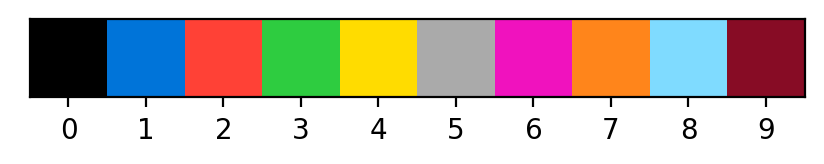

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [41]:
def h_one_color(A):
    b=[]
    A=np.array(A)
    for i in range(len(A[0])):
        if len(np.unique(A[:,i]))==1:
            b.append(i)
    return b

def w_one_color(A):
    b=[]
    A=np.array(A)
    for i in range(len(A)):
        if len(np.unique(A[i,:]))==1:
            b.append(i)
    return b
def maxcolor_b(A):
    A=np.array(A)
    b = np.bincount(A.flatten(),minlength=10)

    c=np.argsort(b)[-1]
    return c
#no count black
def Glue_1x1(List,m,n):
    ans = np.zeros((m, n), dtype = int)
    count=0
    for i in range(m):
        for j in range(n):
            ans[i][j]=List[count]
            count+=1
    return ans.tolist()

In [63]:
#Transformations
def Vert(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[i][j] = 0+M[n-1-i][j]
    return ans.tolist()

def Hor(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[i][j] = 0+M[i][k-1-j]
    return ans.tolist()

def Rot1(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((k,n), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[j][i] = 0 + M[i][k-1-j]
    return ans.tolist()
            
def Rot2(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((k,n), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[j][i] = 0 + M[n-1-i][j]
    return ans.tolist()

Geometric = [[Hor, Hor], [Rot2], [Rot1, Rot1], [Rot1], [Vert], [Hor, Rot2], [Hor], [Vert, Rot2]]

def Apply_geometric(S, x):
    if S in Geometric:
        x1 = Defensive_Copy(x)
        for t in S:
            x1 = t(x1)
    return x1

In [68]:
def getObjectHash(pixmap):
    flat = pixmap.flatten().astype(np.bool)
    mult = np.array([2 ** x for x in range(len(flat))])
    return np.sum(flat * mult)
#經測試沒有overflow問題
def groupByColor(pixmap):
    nb_colors = int(pixmap.max()) + 1
    splited = [(pixmap == i) * i for i in range(1, nb_colors)]
    return [x for x in splited if np.any(x)]
def checkColorMap(a0,b0):
    a=np.array(a0)
    b=np.array(b0)
    a[a==0]=10
    b[b==0]=10
    c = 1
    inp_hashes = sorted([getObjectHash(pm) for pm in groupByColor(a)])
    out_hashes = sorted([getObjectHash(pm) for pm in groupByColor(b)])
    c *= inp_hashes == out_hashes
    return bool(c)
def findColorMap(a,b):
    colormap = {}
    a1=np.array(a).flatten()
    b1=np.array(b).flatten()
    for col, idx in zip(*np.unique(a1,return_index=True)):
        if col in colormap.keys(): continue
        colormap[col] = b1[idx]
    return colormap
def applyColorMap(pixmap, colormap):
    a1=np.array(pixmap)
    for i in range(a1.shape[0]):
        for j in range(a1.shape[1]):
            if a1[i][j] not in colormap: #
                continue #
            a1[i][j]=colormap[pixmap[i][j]]
    return a1.tolist()
def mergedict(dict1):
    dict3={}
    for dict2 in dict1:
        for key in dict2.keys():
            if key not in dict3.keys():
                dict3[key]=dict2[key]
            elif dict3[key]!= dict2[key]:
                return False
    return dict3

In [71]:
def color_classes(a):
    b = len(np.nonzero(np.unique(a))[0])
    return b
#color classes (not include 0)
def take_negative(a0):
    a=np.array(a0)
    a_copy=a.copy()
    if color_classes(a)==2:
        if 0 in a:
            c1,c2=np.unique(a)[1],np.unique(a)[2]
        else:
            c1,c2=np.unique(a)[0],np.unique(a)[1]
        for i in range(len(a0)):
            for j in range(len(a0[0])):
                if a[i][j]==c1:
                    a_copy[i][j]=c2
                elif a[i][j]==c2:
                    a_copy[i][j]=c1

        return a_copy.tolist()
    elif color_classes(a)==1:
        if 0 in a:
            c1,c2=np.unique(a)[0],np.unique(a)[1]
        else:
            return -1
        for i in range(len(a0)):
            for j in range(len(a0[0])):
                if a[i][j]==c1:
                    a_copy[i][j]=c2
                elif a[i][j]==c2:
                    a_copy[i][j]=c1

        return a_copy.tolist()
        
    else:
        return -1

In [38]:
A=Evals[171]["train"][0]["input"]

wlist=w_one_color(A)
wlist.insert(0,-1)
wlist

[-1, 10, 13]

In [34]:
def split_shape_match(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    res=True
    for x0, y0 in zip(Input,Output):
        y1,y2=len(y0),len(y0[0])
        if len(h_one_color(x0))==0 or len(w_one_color(x0))==0:
            res=False
            break
        elif len(h_one_color(x0))+1==y2 and len(w_one_color(x0))+1==y1 and len(h_one_color(x0))+1!=len(x0[0])\
            and len(w_one_color(x0))+1!=len(x0):
            pass
        else:
            res=False
            break
    return res
        
            
        

True


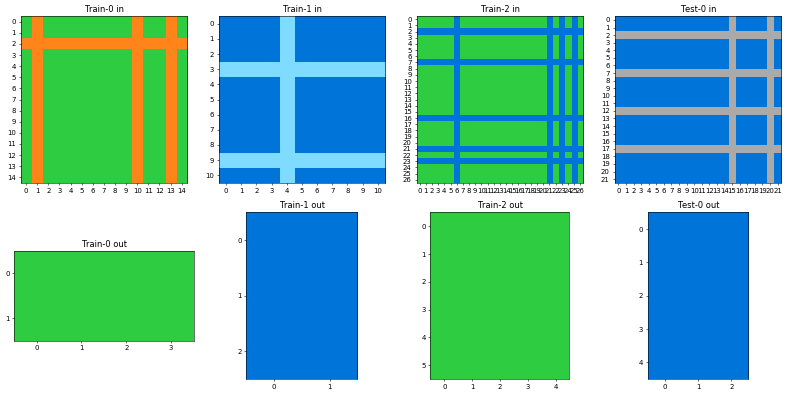

True


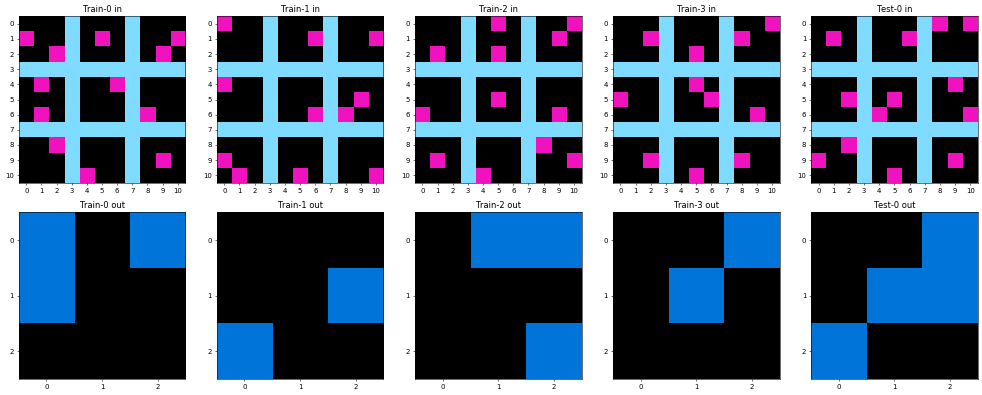

True


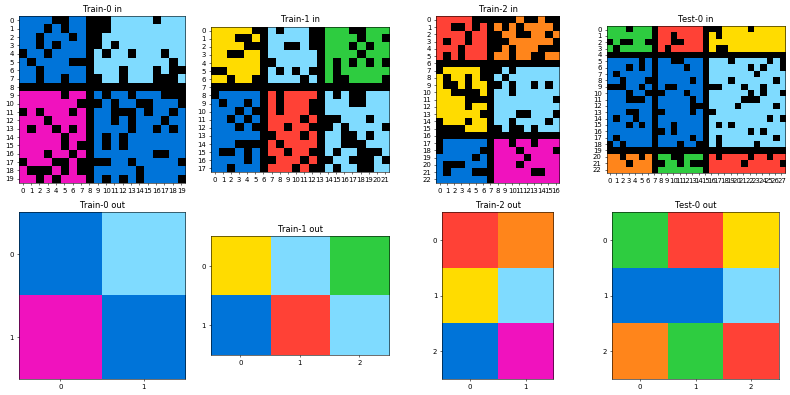

True


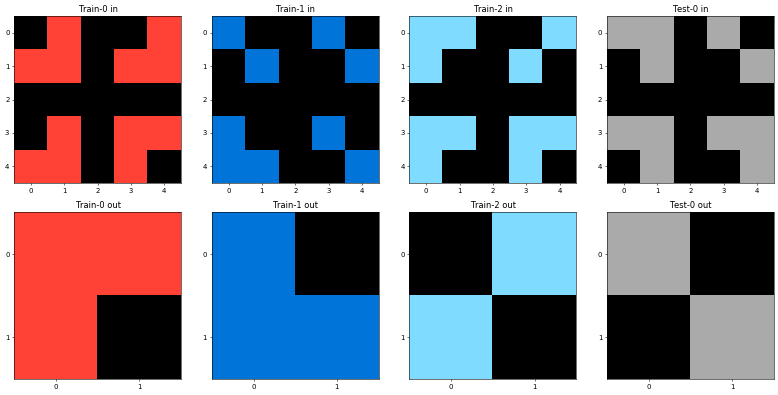

True


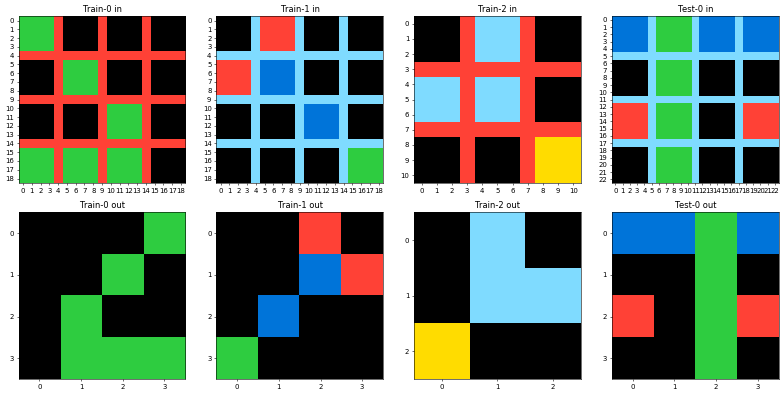

In [46]:
for i in range(400):
    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        a=split_shape_match(basic_task)
        if a ==1 :
            print(a)
            plot_task(task)

In [78]:
######優先度低
def Solve_split_shape_negative(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    colormaps={}
    colorchage=True
    if split_shape_match(basic_task)==False:
        return -1
    for i in range(len(Geometric)):
        
        S = Geometric[i]
        solved = True
        for x0, y0 in zip(Input,Output):
            x0=take_negative(x0)
 
            if x0==-1:
                return -1
            x=np.array(x0)
            y=np.array(y0)
            split_image=[]
            split_color=[]
            wlist=w_one_color(x0)
            hlist=h_one_color(x0)
            wlist.insert(0,-1)
            wlist.append(len(x0))
            hlist.insert(0,-1)
            hlist.append(len(x0[0]))
            for i in range(len(wlist)-1):
                for j in range(len(hlist)-1):
                    split_image.append(x[wlist[i]+1:wlist[i+1],hlist[j]+1:hlist[j+1]])
            for image in split_image:
                split_color.append(maxcolor_b(image))
            res=Glue_1x1(split_color,len(w_one_color(x0))+1,len(h_one_color(x0))+1)
            transformed_x=Apply_geometric(S,res)
            
            if checkColorMap(transformed_x,y0)==False:
                solved = False
                break
            else:
                colormap=findColorMap(transformed_x,y)
#                 print(transformed_x,y)
#                 print(colormaps,colorchage)
                if colorchage==True:
        
                    colormaps=mergedict([colormap,colormaps])
                if colormaps==False:
                    colorchage=False
    

        #####predict
        if solved==True:
            if take_negative(Test_Case)==-1:
                return -1
            else:
                Test_Case=take_negative(Test_Case)
            Test_Case_array=np.array(Test_Case)
            split_image=[]
            split_color=[]

            wlist=w_one_color(Test_Case)
            hlist=h_one_color(Test_Case)
            wlist.insert(0,-1)
            wlist.append(len(Test_Case))
            hlist.insert(0,-1)
            hlist.append(len(Test_Case[0]))
            for i in range(len(wlist)-1):
                for j in range(len(hlist)-1):
                    split_image.append(Test_Case_array[wlist[i]+1:wlist[i+1],hlist[j]+1:hlist[j+1]])

            for image in split_image:
                split_color.append(maxcolor_b(image))
            res=Glue_1x1(split_color,len(w_one_color(Test_Case))+1,len(h_one_color(Test_Case))+1)
            if colorchage==True:
                Transformed_Test_Case = applyColorMap(Apply_geometric(S, res),colormaps)
            else:
                Transformed_Test_Case=Apply_geometric(S,res)
                
            return Transformed_Test_Case
    return -1

In [79]:
def Solve_split_shape(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    colormaps={}
    colorchage=True
    if split_shape_match(basic_task)==False:
        return -1
    for i in range(len(Geometric)):
        
        S = Geometric[i]
        solved = True
        for x0, y0 in zip(Input,Output):
            x=np.array(x0)
            y=np.array(y0)
            split_image=[]
            split_color=[]
            wlist=w_one_color(x0)
            hlist=h_one_color(x0)
            wlist.insert(0,-1)
            wlist.append(len(x0))
            hlist.insert(0,-1)
            hlist.append(len(x0[0]))
            for i in range(len(wlist)-1):
                for j in range(len(hlist)-1):
                    split_image.append(x[wlist[i]+1:wlist[i+1],hlist[j]+1:hlist[j+1]])
            for image in split_image:
                split_color.append(maxcolor_b(image))
            res=Glue_1x1(split_color,len(w_one_color(x0))+1,len(h_one_color(x0))+1)
            transformed_x=Apply_geometric(S,res)
            
            if checkColorMap(transformed_x,y0)==False:
                solved = False
                break
            else:
                colormap=findColorMap(transformed_x,y)
#                 print(transformed_x,y)
#                 print(colormaps,colorchage)
                if colorchage==True:
        
                    colormaps=mergedict([colormap,colormaps])
                if colormaps==False:
                    colorchage=False
    

        #####predict
        if solved==True:
            Test_Case_array=np.array(Test_Case)
            split_image=[]
            split_color=[]

            wlist=w_one_color(Test_Case)
            hlist=h_one_color(Test_Case)
            wlist.insert(0,-1)
            wlist.append(len(Test_Case))
            hlist.insert(0,-1)
            hlist.append(len(Test_Case[0]))
            for i in range(len(wlist)-1):
                for j in range(len(hlist)-1):
                    split_image.append(Test_Case_array[wlist[i]+1:wlist[i+1],hlist[j]+1:hlist[j+1]])

            for image in split_image:
                split_color.append(maxcolor_b(image))
            res=Glue_1x1(split_color,len(w_one_color(Test_Case))+1,len(h_one_color(Test_Case))+1)
            if colorchage==True:
                Transformed_Test_Case = applyColorMap(Apply_geometric(S, res),colormaps)
            else:
                Transformed_Test_Case=Apply_geometric(S,res)
                
            return Transformed_Test_Case
    return -1

20 0


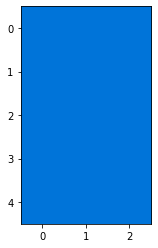

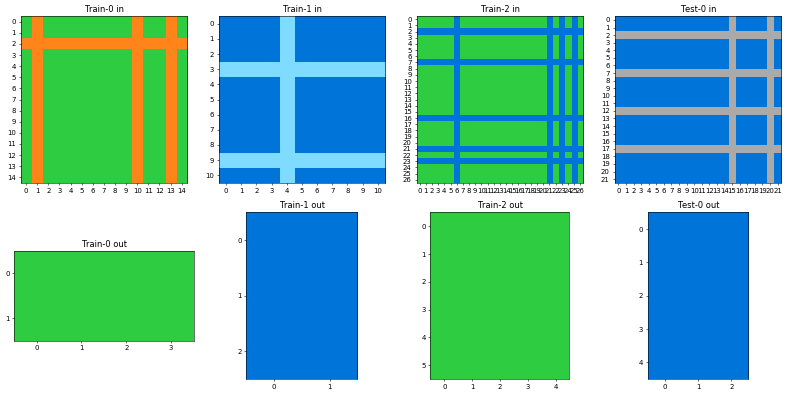

183 0


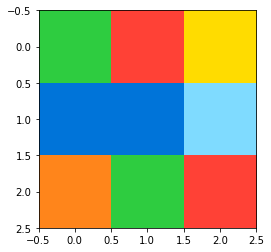

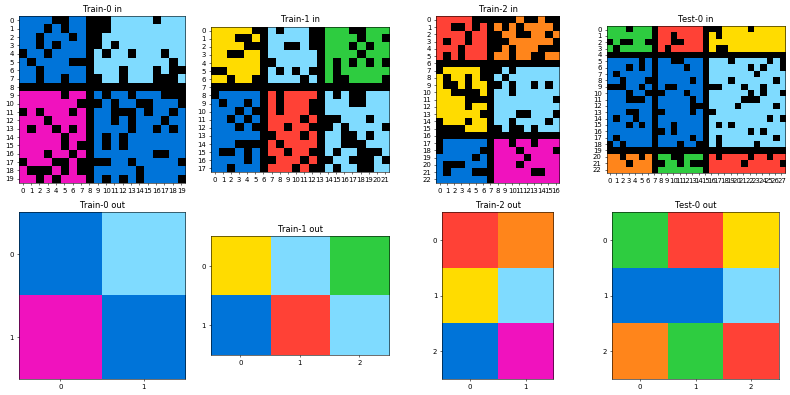

243 0


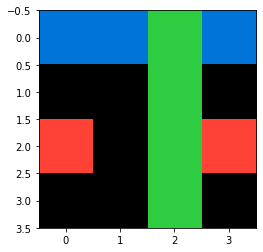

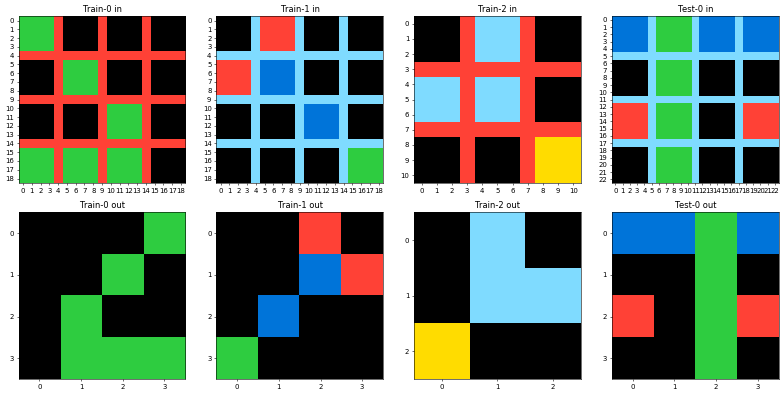

In [80]:
for i in range(400):
    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        a=Solve_split_shape(basic_task)
        if a !=-1 :
            print(i,j)
            plot_picture(a)
            plot_task(task)

20 0


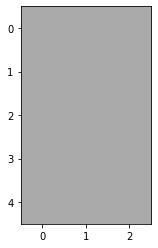

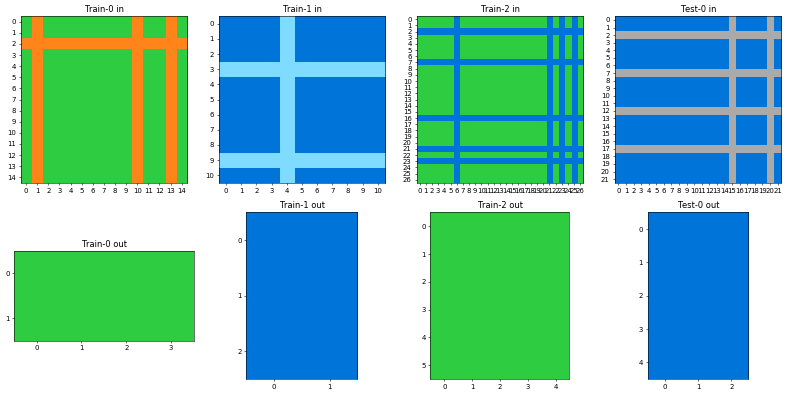

In [84]:
###優先度 低
for i in range(400):
    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        a=Solve_split_shape_negative(basic_task)
        if a !=-1 :
            print(i,j)
            plot_picture(a)
            plot_task(task)